c:\Environment\Python-v3.11.4\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) FangSong.
  fig.canvas.print_figure(bytes_io, **kw)


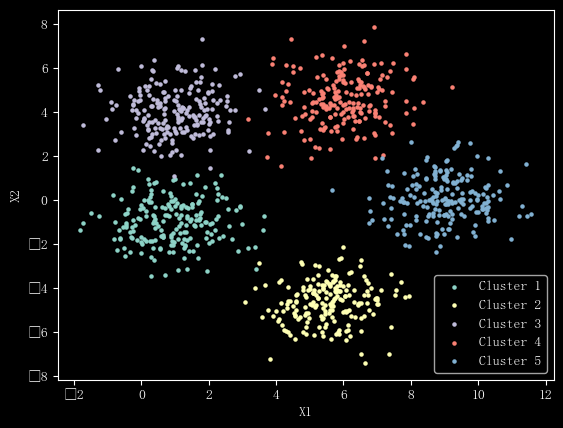

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the covariance matrix Sigma
Sigma = np.array([[1, 0], [0, 1]])

# Define the means for each cluster
mu1 = np.array([1, -1])
mu2 = np.array([5.5, -4.5])
mu3 = np.array([1, 4])
mu4 = np.array([6, 4.5])
mu5 = np.array([9, 0.0])

# Generate random samples from a multivariate normal distribution
x1 = np.random.multivariate_normal(mu1, Sigma, 200)
x2 = np.random.multivariate_normal(mu2, Sigma, 200)
x3 = np.random.multivariate_normal(mu3, Sigma, 200)
x4 = np.random.multivariate_normal(mu4, Sigma, 200)
x5 = np.random.multivariate_normal(mu5, Sigma, 200)

# Combine all data points into a single dataset
X = np.vstack([x1, x2, x3, x4, x5])
# Plot the data points
plt.scatter(x1[:, 0], x1[:, 1], s=5, label='Cluster 1')
plt.scatter(x2[:, 0], x2[:, 1], s=5, label='Cluster 2')
plt.scatter(x3[:, 0], x3[:, 1], s=5, label='Cluster 3')
plt.scatter(x4[:, 0], x4[:, 1], s=5, label='Cluster 4')
plt.scatter(x5[:, 0], x5[:, 1], s=5, label='Cluster 5')

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

plt.show()

In [7]:
from IPython import display

def compute_centroid(points):
    return np.mean(points, axis=0)

# 计算每个点到各个质心的距离
def compute_distances(data, centroids):
    distances = np.zeros((data.shape[0], centroids.shape[0]))
    for i in range(centroids.shape[0]):
        distances[:, i] = np.linalg.norm(data - centroids[i], axis=1)
    return distances

def initialize_centroids(data, k):

    n_samples, _ = data.shape
    centroids = []
    first_centroid_idx = np.random.choice(n_samples)
    centroids.append(data[first_centroid_idx])
    for _ in range(1, k):
        distances = np.array([min(np.linalg.norm(x - c)**2 for c in centroids) for x in data])
        probabilities = distances / distances.sum()
        next_centroid_idx = np.random.choice(n_samples, p=probabilities)
        centroids.append(data[next_centroid_idx])
    
    return np.array(centroids)


def k_means(data, k, max_iters=100):
    centroids = initialize_centroids(data, k)
    labels = np.zeros(data.shape[0])
    tmp_cen = centroids.copy()
    for i in range(max_iters):
        distances = compute_distances(data, centroids)
        new_labels = np.argmin(distances, axis=1)
        if np.all(labels == new_labels):
            print(f"Converged after {i+1} iterations.")
            break
        labels = new_labels
        for j in range(k):
            centroids[j] = compute_centroid(data[labels == j])
        plot_clusters(data, labels, centroids)
    return tmp_cen, centroids, labels

# 匹配聚类中心与真实中心：使用匈牙利算法
def align_labels(centroids, mu_real):
    from scipy.optimize import linear_sum_assignment

    distance_matrix = np.linalg.norm(centroids[:, np.newaxis] - mu_real, axis=2)

    row_ind, col_ind = linear_sum_assignment(distance_matrix)
    # 对齐后的标签
    aligned_centroids = centroids[row_ind]
    aligned_mu_real = mu_real[col_ind]
    
    return aligned_centroids, aligned_mu_real, col_ind

# 可视化数据和聚类结果
def plot_clusters(data, labels, centroids):
    plt.figure(figsize=(8, 6))
    plt.cla()
    for i in range(np.max(labels) + 1):
        plt.scatter(data[labels == i, 0], data[labels == i, 1], s = 5, label=f'Cluster {i+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], color='#0ffff0', marker='x', s=50, label='Centroids')
    plt.legend()
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('K-Means Clustering')
    display.clear_output(wait=True)
    plt.pause(0.01)

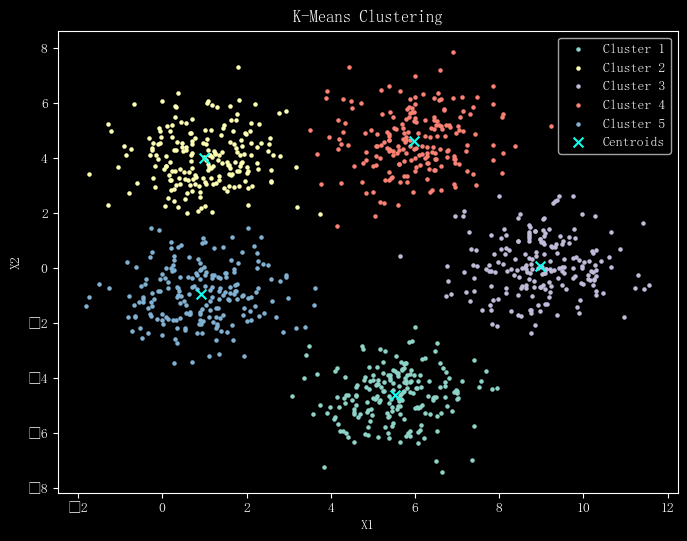

Converged after 4 iterations.
初始化聚类中心：
[[ 4.09298564  5.4544782  -0.22003364 -0.28961308  8.76535038]
 [-5.42363245  3.32215186  3.2752437   0.40352397 -1.53679861]]
初始化聚类中心与所对应的真实分布均值之间的误差：[1.68308832 1.29804479 1.41906792 1.90603815 1.55460941]
聚类中心与所对应的真实分布均值之间的误差：[0.12708637 0.13054112 0.02570909 0.09866502 0.10066848]
聚类精度: 99.10%, 错误个数:9

初始化聚类中心：
[[ 5.10605424e+00  5.86745932e+00  2.08743488e+00  2.23845117e+00
   3.59963489e-01]
 [-4.63420640e+00  5.49477320e+00  4.97976217e+00  2.41510142e-03
  -2.73889607e+00]]
初始化聚类中心与所对应的真实分布均值之间的误差：[0.41617859 1.00356402 1.46371054 6.76154926 1.8529453 ]
聚类中心与所对应的真实分布均值之间的误差：[1.8814134  1.35807311 0.09160522 7.44066697 0.92599906]
聚类精度: 68.70%, 错误个数:313

初始化聚类中心：
[[-1.73010032  8.04472463  1.93683547  0.54900237  7.05323925]
 [ 3.43462376  0.70622027 -3.21079076 -2.23927069  3.79231456]]
初始化聚类中心与所对应的真实分布均值之间的误差：[2.78802763 1.18798069 3.78922181 1.3187838  1.26890961]
聚类中心与所对应的真实分布均值之间的误差：[0.02570909 0.10066848 0.12708637 0.09866502 0.13054

In [11]:

tmp_str = ""
for _ in range(10):
    plt.figure(figsize=(8, 6))
    mu_list = np.vstack([mu1, mu2, mu3, mu4, mu5])
    init_cen, cen, labels = k_means(X, 5)

    A, B, C = align_labels(cen, mu_list)
    errors = np.linalg.norm(A - B, axis=1)

    aligned_labels = [int(C[labels[i]]) for i in range(len(labels))]
    true_labels = np.concatenate([np.full(200, i) for i in range(5)])
    tmp_str += f"初始化聚类中心：\n{init_cen.T}\n"
    tmp_str += f"初始化聚类中心与所对应的真实分布均值之间的误差：{np.linalg.norm(align_labels(init_cen, mu_list)[0] - align_labels(init_cen, mu_list)[1], axis=1)}\n"
    tmp_str += f"聚类中心与所对应的真实分布均值之间的误差：{errors}\n"
    tmp_str += f"聚类精度: {np.sum(true_labels == aligned_labels)/len(labels)*100:.2f}%, 错误个数:{np.sum(true_labels != aligned_labels)}\n\n"
    # plt.show()
print(tmp_str)